# Lesson 19: Regression demonstration

This notebook demonstrates key concepts and tools for training supervised regression models.

1. **What is regression**
    - Regression problems
    - Model training

2. **Regression metrics**
    - Residuals: RSS, MSE, RMSE and MAE
    - R-squared

3. **Evaluating regression model performance**
    - Train-test split
    - Overfitting

4. **Dealing with overfilling**
5. **Optimizing regression models**
6. **Scikit-learn pipelines example**

## Notebook set up
### Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.feature_extraction import FeatureHasher
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error,
    root_mean_squared_error,
    mean_absolute_error,
    r2_score
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

## 1. What is regression?

A regression model predicts the value of a continuous output variable (label) from one or more input variables (features).

### 1.1. Regression problem: circumference of a circle

In [ ]:
url = 'https://gperdrizet.github.io/FSA_devops/assets/data/unit3/diameter_circumference.csv'
df = pd.read_csv(url)
df

,diameter,circumference
0,3.0,9.056466
1,3.2,10.247696
2,3.6,11.015775
3,4.8,14.788864
4,6.1,19.385014
5,7.2,22.025133
6,8.7,27.192756
7,10.0,31.244334
8,11.3,35.256537
9,11.9,37.321937


In [3]:
def regression_model(diameters):
    circumferences = np.pi * diameters
    return circumferences

circumference_predictions = regression_model(df['diameter'])

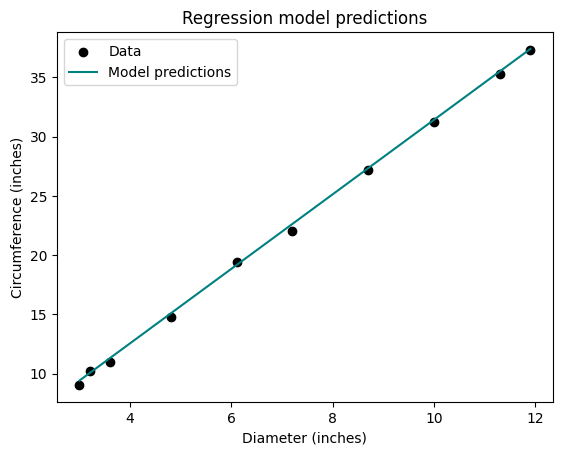

In [4]:
plt.title('Regression model predictions')
plt.scatter(df['diameter'], df['circumference'], color='black', label='Data')
plt.plot(df['diameter'], circumference_predictions, color='teal', label='Model predictions')
plt.xlabel('Diameter (inches)')
plt.ylabel('Circumference (inches)')
plt.legend()
plt.show()

### 1.2. Model training

In [5]:
model = LinearRegression()
model.fit(df['diameter'].to_frame(), df['circumference'])
predicted_circumference = model.predict(df['diameter'].to_frame())

print(f'Slope: {model.coef_[0]:.3f}')

Slope: 3.141


## 2. Regression metrics

### 2.1. Residuals

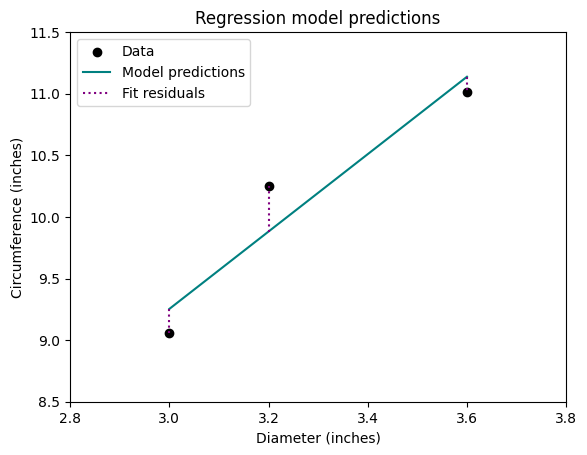

In [6]:
residuals = df['circumference'] - predicted_circumference

plt.title('Regression model predictions')
plt.scatter(df['diameter'][:3], df['circumference'][:3], color='black', label='Data')
plt.plot(df['diameter'][:3], predicted_circumference[:3], color='teal', label='Model predictions')

# Add vertical dotted lines for residuals
for i in range(3):
    plt.plot(
        [df['diameter'].iloc[i], df['diameter'].iloc[i]], 
        [predicted_circumference[i], df['circumference'].iloc[i]], 
        linestyle=':', color='purple', label='Fit residuals' if i == 0 else None
    )

plt.xlim(2.8, 3.8)
plt.ylim(8.5, 11.5)
plt.xlabel('Diameter (inches)')
plt.ylabel('Circumference (inches)')
plt.legend()
plt.show()

In [7]:
# Calculate metrics using sklearn
MSE = mean_squared_error(df['circumference'], predicted_circumference)
RMSE = root_mean_squared_error(df['circumference'], predicted_circumference)
MAE = mean_absolute_error(df['circumference'], predicted_circumference)

# RSS is not directly available in sklearn, but can be calculated from MSE
n = len(df)
RSS = MSE * n

print(f'RSS:  {RSS:.4f} inches²')
print(f'MSE:  {MSE:.4f} inches²')
print(f'RMSE: {RMSE:.4f} inches')
print(f'MAE:  {MAE:.4f} inches')

RSS:  0.5529 inches²
MSE:  0.0553 inches²
RMSE: 0.2351 inches
MAE:  0.1842 inches


### 2.2. R-squared

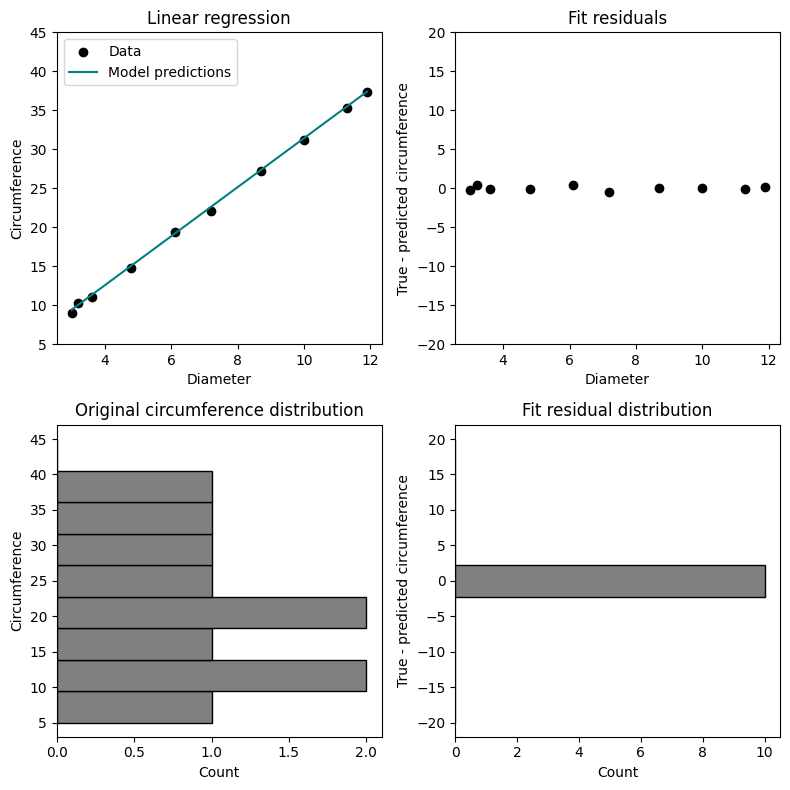

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(8,8))
axs = axs.flatten()

axs[0].set_title('Linear regression')
axs[0].scatter(df['diameter'], df['circumference'], color='black', label='Data')
axs[0].plot(df['diameter'], circumference_predictions, color='teal', label='Model predictions')
axs[0].set_ylim(5, 45)
axs[0].set_xlabel('Diameter')
axs[0].set_ylabel('Circumference')
axs[0].legend(loc='upper left')

axs[1].set_title('Fit residuals')
axs[1].scatter(df['diameter'], residuals, color='black')
axs[1].set_ylim(-20, 20)
axs[1].set_xlabel('Diameter')
axs[1].set_ylabel('True - predicted circumference')

bins = np.linspace(5, 45, 10)
axs[2].set_title('Original circumference distribution')
axs[2].hist(df['circumference'], color='grey', edgecolor='black', bins = bins, orientation='horizontal')
axs[2].set_xlabel('Count')
axs[2].set_ylabel('Circumference')

bins = np.linspace(-20, 20, 10)
axs[3].set_title('Fit residual distribution')
axs[3].hist(residuals, color='grey', edgecolor='black', bins=bins, orientation='horizontal')
axs[3].set_xlabel('Count')
axs[3].set_ylabel('True - predicted circumference')

fig.tight_layout()

In [9]:
y_var = np.var(df['circumference'])
y_residual_var = np.var(residuals)

variance_explained = 1 - (y_residual_var / y_var)

print(f'Data variance: {y_var:.0f}, residual variance: {y_residual_var:.3f}')
print(f'Fraction of variance explained: {variance_explained:.3f}')

Data variance: 101, residual variance: 0.055
Fraction of variance explained: 0.999


In [10]:
sk_r2 = r2_score(df['circumference'], predicted_circumference)
print(f'Scikit-learn R-squared: {sk_r2:.3f}')

Scikit-learn R-squared: 0.999


## 3. Evaluating regression model performance

In [ ]:
url = 'https://gperdrizet.github.io/FSA_devops/assets/data/unit3/distance_to_water.csv'
df = pd.read_csv(url)

# Ordinal encode quality
categories = [['poor', 'fair', 'good', 'excellent']]
encoder = OrdinalEncoder(categories=categories)
df['quality'] = encoder.fit_transform(df[['quality']])

encoder = OneHotEncoder(sparse_output=False, drop='first')
onehot_array = encoder.fit_transform(df[['region']])

# One hot encode region
df_onehot = pd.DataFrame(
    onehot_array,
    columns=encoder.get_feature_names_out(['region']),
    index=df.index
)

df.drop(columns=['region'], inplace=True)

# Hash location_id
hasher = FeatureHasher(n_features=10, input_type='string')
hashed_features = hasher.transform(df['location_id'].apply(lambda x: [x]))
hashed_array = hashed_features.toarray()

hashed_df = pd.DataFrame(
    hashed_array,
    columns=[f'hash_{i}' for i in range(hashed_array.shape[1])]
)

df.drop(columns=['location_id'], inplace=True)

# Combine all encoded features
encoded_df = pd.concat([df, df_onehot, hashed_df], axis=1)

# Add polynomial features
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly_transformer.fit_transform(encoded_df.drop(columns=['distance_to_water']))

poly_features_df = pd.DataFrame(
    poly_features,
    columns=poly_transformer.get_feature_names_out(encoded_df.drop(columns=['distance_to_water']).columns),
    index=df.index
)

poly_features_df['distance_to_water'] = encoded_df['distance_to_water']
df = poly_features_df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 465 entries, area to distance_to_water
dtypes: float64(465)
memory usage: 17.7 MB


### 3.1. Train-test split

In [33]:
train_df, test_df = train_test_split(df)

print(f'Original dataframe shape: {df.shape}')
print(f'Training dataframe shape: {train_df.shape}')
print(f'Testing dataframe shape: {test_df.shape}')

Original dataframe shape: (5000, 465)
Training dataframe shape: (3750, 465)
Testing dataframe shape: (1250, 465)


In [34]:
model = LinearRegression()

fit_result = model.fit(
    train_df.drop(columns='distance_to_water'),
    train_df['distance_to_water']
)

train_predictions = model.predict(
    train_df.drop(columns='distance_to_water')
)

train_rsq = root_mean_squared_error(train_df['distance_to_water'], train_predictions)
print(f'Training R-squared: {train_rsq:.1f}')

Training R-squared: 94.9


In [35]:
test_predictions = model.predict(
    test_df.drop(columns='distance_to_water')
)

test_rsq = root_mean_squared_error(test_df['distance_to_water'], test_predictions)
print(f'Testing R-squared: {test_rsq:.1f}')

Testing R-squared: 106.4


### 3.2. Cross-validation

Mean cross-validation RMSE: 436.2 ± 384.9
95% CI: ± 51.4 to 821.1
Test RMSE: 106.4


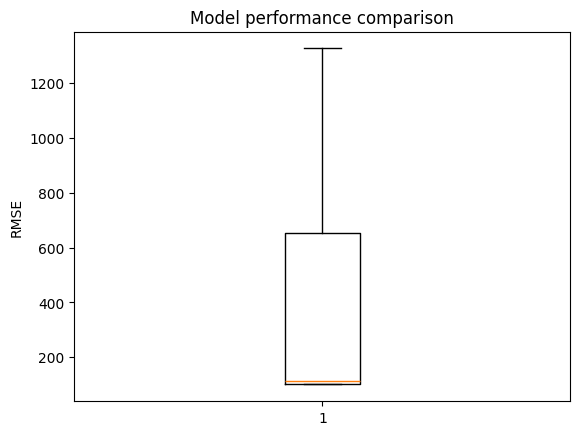

In [ ]:
from sklearn.model_selection import cross_val_score

model = LinearRegression()

cv_scores = cross_val_score(
    model,
    df.drop(columns='distance_to_water'),
    df['distance_to_water'],
    cv=7,
    scoring='neg_root_mean_squared_error'
)

cv_rmse = -cv_scores

mean_cv_rmse = cv_rmse.mean()
std_cv_rmse = cv_rmse.std()
ci_95 = 1.96 * std_cv_rmse / np.sqrt(len(cv_rmse))

print(f'Mean cross-validation RMSE: {mean_cv_rmse:.1f} ± {ci_95:.1f}')
print(f'95% CI: ± {mean_cv_rmse - ci_95:.1f} to {mean_cv_rmse + ci_95:.1f}')
print(f'Test RMSE: {test_rsq:.1f}')

plt.title('Model performance comparison')
plt.boxplot(cv_rmse)
plt.ylabel('Cross-validation RMSE')
plt.show()

### 3.3. Over fitting

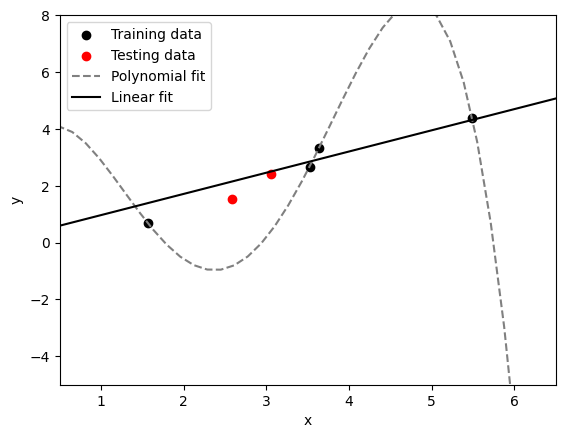

In [26]:
x_training=np.array([1,2,3,4,5]) + np.random.normal(-0.5,0.5,5)
y_training=np.array([1,2,3,4,5]) + np.random.normal(-0.5,0.5,5)

x_test=np.array([2.5,3.5]) + np.random.normal(-0.5,0.5,2)
y_test=np.array([2.5,3.5]) + np.random.normal(-0.5,0.5,2)

poly_fit=np.polyfit(x_training,y_training,4)
poly_model=np.poly1d(poly_fit)

x_range=np.linspace(0,8)
y_poly=poly_model(x_range)

linear_model=LinearRegression()
linear_model.fit(x_training.reshape(-1, 1), y_training)
y_linear=linear_model.predict(x_range.reshape(-1, 1))

plt.scatter(x_training,y_training, color='black', label='Training data')
plt.scatter(x_test,y_test, color='red', label='Testing data')
plt.plot(x_range, y_poly, linestyle='dashed', color='grey', label='Polynomial fit')
plt.plot(x_range, y_linear, color='black', label='Linear fit')
plt.xlim(0.5,6.5)
plt.ylim(-5,8)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()